#**DL LAB 1**

#**By: Ujwal Shah (Roll No : J078)**

## 1) Flower Recognition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import random as rn

In [ ]:
!wget http://upscfever.com/datasets/flowers-new.zip -P drive/app
import os
os.chdir('drive/app')  #change dir
!unzip -q flowers-new.zip  #unzip data in test/

--2020-12-08 13:46:33--  http://upscfever.com/datasets/flowers-new.zip
Resolving upscfever.com (upscfever.com)... 104.27.176.133, 104.27.177.133, 172.67.193.2, ...
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/flowers-new.zip [following]
--2020-12-08 13:46:33--  https://upscfever.com/datasets/flowers-new.zip
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘drive/app/flowers-new.zip’

flowers-new.zip         [      <=>           ]   5.74M  4.06MB/s    in 1.4s    

2020-12-08 13:46:35 (4.06 MB/s) - ‘drive/app/flowers-new.zip’ saved [6021364]



In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers/sunflower'
FLOWER_TULIP_DIR='flowers/tulip'
FLOWER_DANDI_DIR='flowers/dandelion'
FLOWER_ROSE_DIR='flowers/rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 13/13 [00:00<00:00, 301.15it/s]

13


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 359.27it/s]

39


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 309.19it/s]

65


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 355.86it/s]

91


In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 326.44it/s]

117


###Visualizing some Random Images

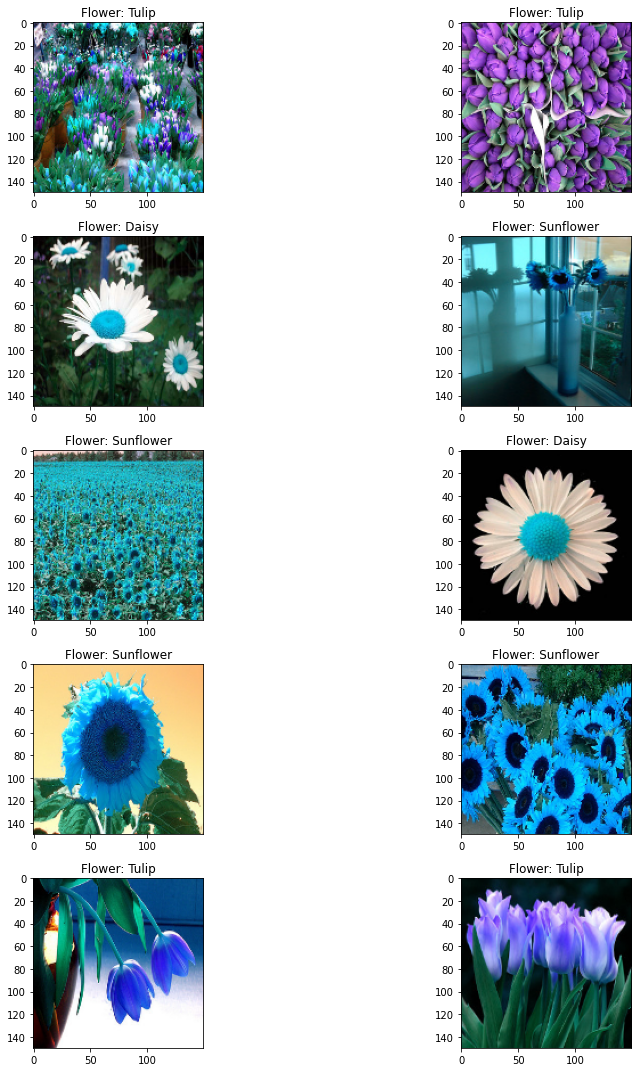

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()        

### Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

###Splitting into Training and Validation Sets

In [ ]:
print("x-shape",X.shape)
#print(X)
print("y-shape",Y.shape)
#print(Y)

x-shape (117, 150, 150, 3)
y-shape (117, 5)


In [ ]:
X_train,x_temp,y_train,y_temp=train_test_split(X,Y,test_size=0.4,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)
print( "X - Train Shape: ",X_train.shape)
print( "Y - Train Shape: ",y_train.shape)
print( "X - Val Shape: ",X_val.shape)
print( "Y - Val Shape: ",y_val.shape)
print( "X - Test Shape: ",X_test.shape)
print( "Y - Test Shape: ",y_test.shape)

X - Train Shape:  (70, 150, 150, 3)
Y - Train Shape:  (70, 5)
X - Val Shape:  (23, 150, 150, 3)
Y - Val Shape:  (23, 5)
X - Test Shape:  (24, 150, 150, 3)
Y - Test Shape:  (24, 5)


###Model Building

In [ ]:
# # modelling starts using a CNN.
from keras.models import Sequential
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.10))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.10))

model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.10))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.10))

model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.10))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
#Data Generator 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras import layers
import keras
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping

datagen =ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10,  
        zoom_range = 0.2, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True, 
        vertical_flip=False) 
  
train_generator=datagen.flow(X_train,y_train)
val_generator=datagen.flow(X_val,y_val)

test_datagen=ImageDataGenerator()
test_generator=test_datagen.flow(X_test,y_test)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
filepath = "weights-improvement-flower.h5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.01, baseline=2.0)
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)
callbacks_list = [checkpoint, es,red_lr]

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [ ]:
history=model.fit_generator(train_generator,validation_data=val_generator, epochs=100,callbacks=callbacks_list)

###Plot of accuracy of Train & Validation

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

###Plot of Loss of Train & Validation

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Loss")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

In [ ]:
from keras.models import load_model
saved_model = load_model('weights-improvement-flower.h5')
test_loss, test_acc=saved_model.evaluate_generator(generator=test_generator)
print('Test Accuracy:',test_acc*100)
print('Test Loss:',test_loss)

Screenshot of the Above Run-time Test Accuracy.

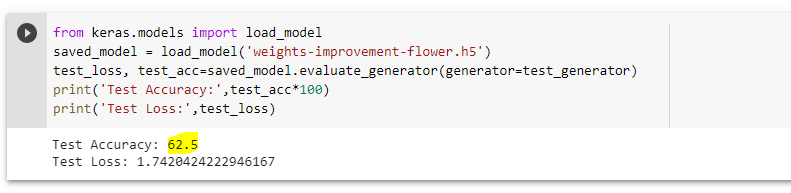

In [ ]:
#Test Accuracy: 58.33333134651184
#Test Loss: 1.4703909158706665



---



---



#2) Arabic alphabets

## Importing the necessary libraries

In [ ]:
from keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix

## Loading the dataset

In [ ]:
!wget http://upscfever.com/datasets/csvTrainImages13440x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTrainLabel13440x1.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestImages3360x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestLabel3360x1.csv -P drive/app

--2020-12-08 13:17:09--  http://upscfever.com/datasets/csvTrainImages13440x1024.csv
Resolving upscfever.com (upscfever.com)... 104.27.176.133, 104.27.177.133, 172.67.193.2, ...
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/csvTrainImages13440x1024.csv [following]
--2020-12-08 13:17:09--  https://upscfever.com/datasets/csvTrainImages13440x1024.csv
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘drive/app/csvTrainImages13440x1024.csv’

csvTrainImages13440     [  <=>               ]  28.22M   101MB/s    in 0.3s    

2020-12-08 13:17:09 (101 MB/s) - ‘drive/app/csvTrainImages13440x1024.csv’ saved [29593405]

--2020-12-08 13:17:09--  http://upscfever.com/datasets/csvTrainLabel13440x1.csv
Resolving upscfever.com (upscfever.com)... 104.27.176.1

In [ ]:
train_data = pd.read_csv('drive/app/csvTrainImages13440x1024.csv', header = None)
train_label = pd.read_csv('drive/app/csvTrainLabel13440x1.csv', header = None)
test_data = pd.read_csv('drive/app/csvTestImages3360x1024.csv', header = None)
test_label = pd.read_csv('drive/app/csvTestLabel3360x1.csv', header = None)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB


## The Dataset
The dataset used here is the [Arabic Handwritten Characters Dataset](https://www.kaggle.com/mloey1/ahcd1).

The trainIamges csv has 1024 columns and 13440 rows. Each column represents a pixel in an image and each row represents an individual grayscale image. The value of each pixel varies from 0 -255.

In [ ]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32')-1

## Visualizing the dataset

In [ ]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)

In [ ]:
def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

### The training set

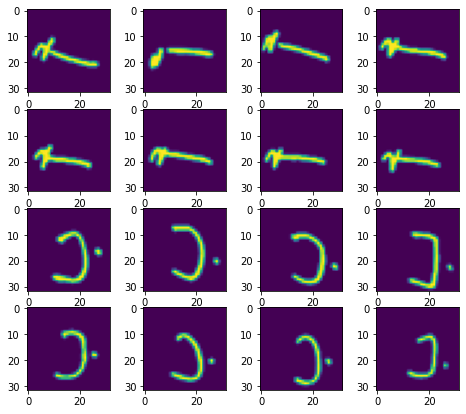

In [ ]:
display_image(train_data, 32, 16)

### The test set

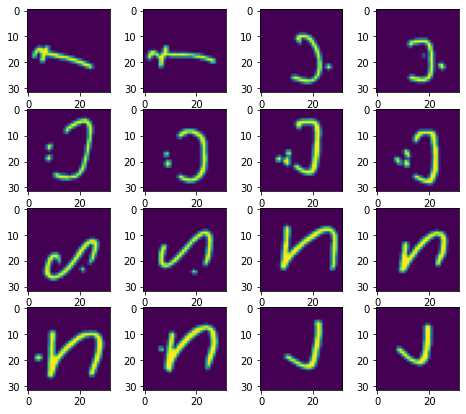

In [ ]:
display_image(test_data, 32, 16)

## Data preprocessing

### Encoding categorical variables

In [ ]:
train_label = to_categorical(train_label,28)
test_label  = to_categorical(test_label,28)

In [ ]:
#Normalization
train_data = train_data/255
test_data = test_data/255

In [ ]:
train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

In [ ]:
print( "X - Train Shape: ",train_data.shape)
print( "Y - Train Shape: ",train_label.shape)
print( "X - Test Shape: ",test_data.shape)
print( "Y - Test Shape: ",test_label.shape)

X - Train Shape:  (13440, 32, 32, 1)
Y - Train Shape:  (13440, 28)
X - Test Shape:  (3360, 32, 32, 1)
Y - Test Shape:  (3360, 28)


Reshaping is done to make the data represent a 2D image

###Splitting into Training and Validation Sets

In [ ]:
X_val,X_test,y_val,y_test=train_test_split(test_data,test_label,test_size=0.5,random_state=42)

print( "X - Train Shape: ",train_data.shape)
print( "Y - Train Shape: ",train_label.shape)
print( "X - Val Shape: ",X_val.shape)
print( "Y - Val Shape: ",y_val.shape)
print( "X - Test Shape: ",X_test.shape)
print( "Y - Test Shape: ",y_test.shape)

X - Train Shape:  (13440, 32, 32, 1)
Y - Train Shape:  (13440, 28)
X - Val Shape:  (1680, 32, 32, 1)
Y - Val Shape:  (1680, 28)
X - Test Shape:  (1680, 32, 32, 1)
Y - Test Shape:  (1680, 28)


In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the CNN

In [ ]:
# # modelling starts using a CNN.
from keras.models import Sequential
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.15))


model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.15))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.10))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(28, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
filepath = "weights-improvement-arabic-recognition.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.01, baseline=2.0)
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)
callbacks_list = [checkpoint, es,red_lr]

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,train_label,validation_data=(X_val,y_val), epochs=100,callbacks=callbacks_list)

Epoch 1/100
416/420 [============================>.] - ETA: 0s - loss: 1.4346 - accuracy: 0.5494
Epoch 00001: val_accuracy improved from -inf to 0.80952, saving model to weights-improvement-arabic-recognition.hdf5
420/420 [==============================] - 5s 12ms/step - loss: 1.4272 - accuracy: 0.5519 - val_loss: 0.5758 - val_accuracy: 0.8095
Epoch 2/100
417/420 [============================>.] - ETA: 0s - loss: 0.4571 - accuracy: 0.8433
Epoch 00002: val_accuracy improved from 0.80952 to 0.89524, saving model to weights-improvement-arabic-recognition.hdf5
420/420 [==============================] - 5s 11ms/step - loss: 0.4568 - accuracy: 0.8435 - val_loss: 0.3233 - val_accuracy: 0.8952
Epoch 3/100
416/420 [============================>.] - ETA: 0s - loss: 0.3118 - accuracy: 0.8935
Epoch 00003: val_accuracy improved from 0.89524 to 0.90357, saving model to weights-improvement-arabic-recognition.hdf5
420/420 [==============================] - 5s 11ms/step - loss: 0.3110 - accuracy: 0.893

###Plot of accuracy of Train & Validation

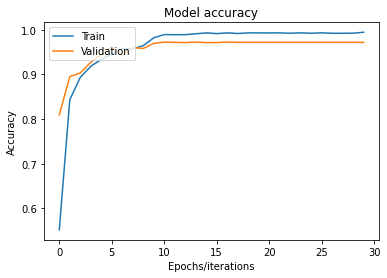

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

###Plot of Loss of Train & Validation

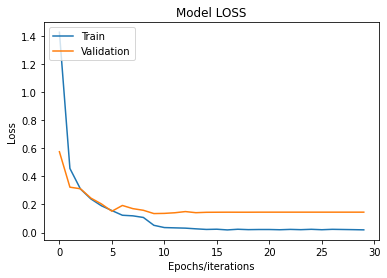

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Loss")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

In [ ]:
from keras.models import load_model
saved_model1 = load_model("weights-improvement-arabic-recognition.hdf5")
test_loss, test_acc=saved_model1.evaluate(X_test,y_test)
print('Test Accuracy:',test_acc*100)
print('Test Loss:',test_loss)

53/53 [==============================] - 0s 4ms/step - loss: 0.1089 - accuracy: 0.9702
Test Accuracy: 97.02380895614624
Test Loss: 0.10891549289226532


Screenshot of the Above Run-time Test Accuracy.

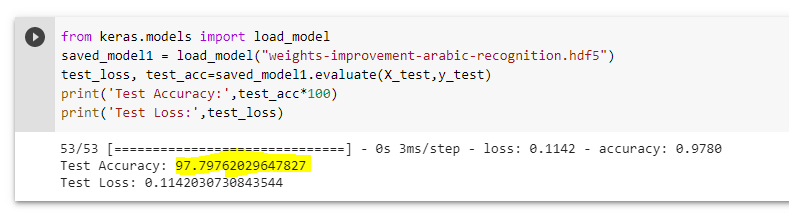



---



---

